In [39]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\amitk\Desktop\Data\Data\Online_Payments_Fraud_Detection.csv")

In [4]:
df.head()   ### first five rows:

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


info about the dataset:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
df.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


size of the df:

In [8]:
df.shape

(6362620, 11)

checking frequency of values in each categorical columns :

In [9]:
df['type'].value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [13]:
df['isFlaggedFraud'].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [14]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [15]:
df[(df['type']=='TRANSFER') | (df['type']=='PAYEMENT')]['isFraud'].value_counts()

isFraud
0    528812
1      4097
Name: count, dtype: int64

removing isFlaggedFraud column:

In [16]:
df=df.drop('isFlaggedFraud',axis=1)

In [17]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

dropping all rows from df where type column contains either 'CASH_OUT' or 'CASH_IN' or 'DEBIT':

In [18]:
df = df[df['type'].isin(['TRANSFER', 'PAYMENT'])]

In [19]:
df.shape

(2684404, 10)

duplicated rows:

In [20]:
df[df.duplicated()]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud


checking anny null values in the df:

In [21]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [22]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.0,0.0,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.00,C1470998563,0.0,0.0,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.0,0.0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.0,0.0,1


Feture Engineering :Creating New Features

1.1 Transaction Time Features :

hour: Extracts the hour of the transaction.
is_night: Flags transactions occurring between midnight and 6 AM (higher fraud probability).

In [23]:
df['hour'] = df['step'] % 24  # Extract hour from step (since 1 step = 1 hour)
df['is_night'] = df['hour'].apply(lambda x: 1 if x < 6 else 0)  # Flag night transactions

In [24]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1


1.2 Transaction Amount Features

Compare transaction amounts with sender's balance.
amount_ratio: Measures how significant the transaction amount is compared to the sender's balance.
High values (~1) might indicate risky transactions.

In [25]:
df['amount_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1)  # Avoid division by zero

In [26]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146


1.3 Balance Difference Features

Check unexpected balance changes.
sender_balance_change: Difference between sender's old and new balance.
receiver_balance_change: Difference between recipient's old and new balance.

Fraudulent transactions may not update balances correctly.

In [27]:
df['sender_balance_change'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['receiver_balance_change'] = df['newbalanceDest'] - df['oldbalanceDest']

In [28]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,1,1,0.999644,2806.00,0.0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,1,1,0.999950,20128.00,0.0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,1,1,0.999999,1277212.77,0.0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,1,1,0.999971,35063.63,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,22,0,0.999984,63416.99,0.0
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,23,0,0.999999,1258818.82,0.0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,23,0,0.999997,339682.13,0.0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,23,0,1.000000,6311409.28,0.0


1.4 Unexpected Zero Balances

In fraudulent transactions, balances might remain unchanged.
orig_balance_zero: Indicates whether the sender had a zero balance before the transaction.
dest_balance_zero: Indicates whether the receiver had a zero balance before the transaction.
    
Fraudsters may use new accounts with zero balance to receive money.

In [29]:
df['orig_balance_zero'] = (df['oldbalanceOrg'] == 0).astype(int)
df['dest_balance_zero'] = (df['oldbalanceDest'] == 0).astype(int)

In [30]:
df.sample(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero
2426124,202,PAYMENT,1703.55,C567294600,282865.0,281161.45,M1328755786,0.0,0.0,0,10,0,0.006022,1703.55,0.0,0,1
3501927,259,PAYMENT,1175.81,C1873654199,7044.0,5868.19,M87927825,0.0,0.0,0,19,0,0.166900,1175.81,0.0,0,1
5786197,400,PAYMENT,28922.67,C1497451457,62014.0,33091.33,M902234824,0.0,0.0,0,16,0,0.466382,28922.67,0.0,0,1
5477593,379,PAYMENT,17088.54,C1807965550,0.0,0.00,M183537687,0.0,0.0,0,19,0,17088.540000,0.00,0.0,1,1


In [31]:
df[df['isFraud']==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,1,1,0.999644,2806.00,0.0,0,1
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,1,1,0.999950,20128.00,0.0,0,1
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,1,1,0.999999,1277212.77,0.0,0,1
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,1,1,0.999971,35063.63,0.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.0,C1812552860,0.0,0.0,1,22,0,0.999984,63416.99,0.0,0,1
6362612,743,TRANSFER,1258818.82,C1531301470,1258818.82,0.0,C1470998563,0.0,0.0,1,23,0,0.999999,1258818.82,0.0,0,1
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.0,C1850423904,0.0,0.0,1,23,0,0.999997,339682.13,0.0,0,1
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.0,0.0,1,23,0,1.000000,6311409.28,0.0,0,1


2. Encoding Categorical Features

- Convert categorical variables into numerical representations.
- Encodes the type column (e.g., CASH_OUT, TRANSFER) using one-hot encoding.

In [32]:
dummies=pd.get_dummies(df['type']).astype(int)
dummies.tail()

,PAYMENT,TRANSFER
6362610,0,1
6362612,0,1
6362614,0,1
6362616,0,1
6362618,0,1


In [33]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [34]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,True
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,False
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146,7817.71,0.0,0,1,False


In [35]:
df['type_TRANSFER'] = df['type_TRANSFER'].astype(int)
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,1,1,0.057834,9839.64,0.0,0,1,0
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,1,1,0.087731,1864.28,0.0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,1,1,0.994505,181.00,0.0,0,1,1
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,1,1,0.280788,11668.14,0.0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,1,1,0.145146,7817.71,0.0,0,1,0


3. Dropping Irrelevant Columns :

In [36]:
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

In [37]:
df.shape

(2684404, 15)

In [38]:
df.sample(10)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
1681555,159,891792.48,38975.00,0.00,0.00,891792.48,0,15,0,22.880554,38975.00,891792.48,0,1,1
1137418,131,5744.26,48659.00,42914.74,0.00,0.00,0,11,0,0.118049,5744.26,0.00,0,1,0
1061695,119,10112.33,0.00,0.00,0.00,0.00,0,23,0,10112.330000,0.00,0.00,1,1,0
835869,41,15078.08,0.00,0.00,0.00,0.00,0,17,0,15078.080000,0.00,0.00,1,1,0
1741372,161,1620.73,0.00,0.00,0.00,0.00,0,17,0,1620.730000,0.00,0.00,1,1,0
782162,39,5373.32,421878.32,416505.00,0.00,0.00,0,15,0,0.012737,5373.32,0.00,0,1,0
3573402,261,486.97,52174.47,51687.49,0.00,0.00,0,21,0,0.009333,486.98,0.00,0,1,0
1871495,164,19668.65,31212.00,11543.35,0.00,0.00,0,20,0,0.630143,19668.65,0.00,0,1,0
3825424,282,280952.84,20579.00,0.00,291731.05,572683.89,0,18,0,13.651741,20579.00,280952.84,0,0,1
4598107,328,10000000.00,9937.00,0.00,413671.28,21196300.25,0,16,0,1006.238680,9937.00,20782628.97,0,0,1


Plotting

<Axes: >

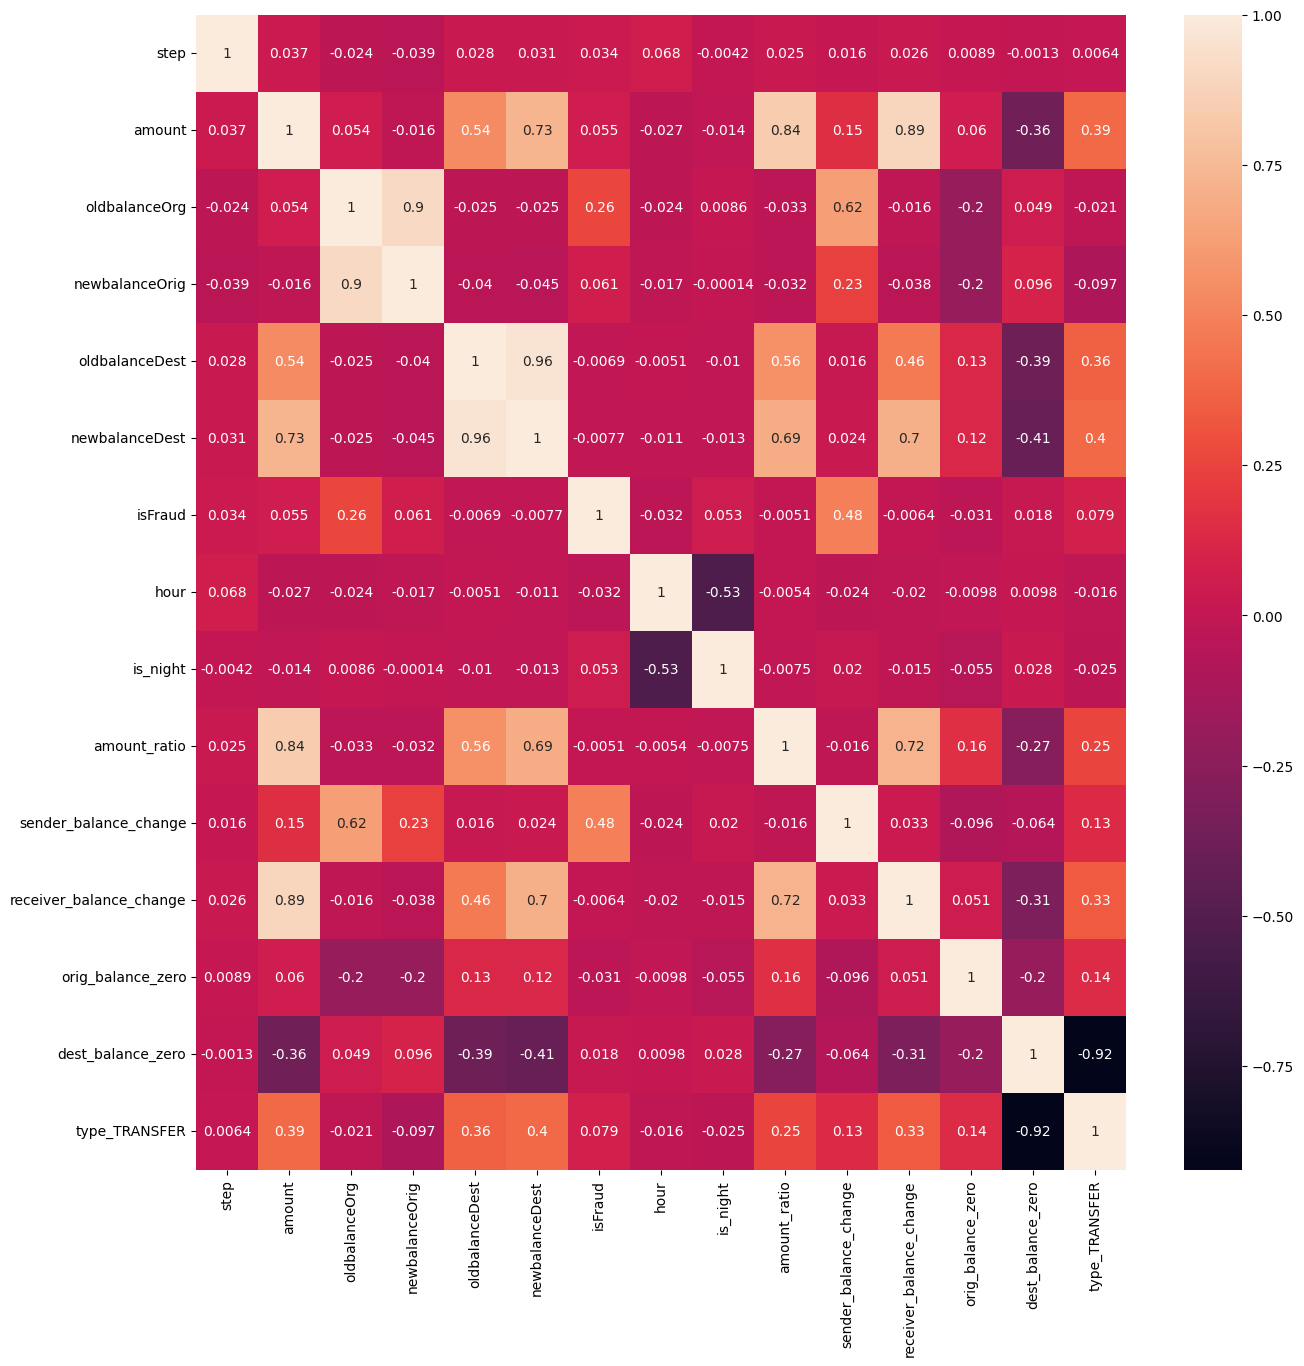

In [40]:
corr=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr ,annot=True)

In [41]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
count,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06,2.684404e+06
mean,2.448306e+02,1.912474e+05,6.548221e+04,5.160422e+04,5.097222e+05,7.056541e+05,1.526223e-03,1.535208e+01,2.670909e-02,1.020612e+05,1.387800e+04,1.959319e+05,3.937664e-01,8.257431e-01,1.985204e-01
std,1.431616e+02,9.108498e+05,2.649473e+05,2.125782e+05,2.878561e+06,3.583985e+06,3.903709e-02,4.676800e+00,1.612319e-01,7.723748e+05,1.169518e+05,1.184107e+06,4.885842e-01,3.793303e-01,3.988861e-01
min,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.462010e-07,0.000000e+00,-6.755514e+06,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,5.501128e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.200000e+01,0.000000e+00,2.020453e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.490000e+02,1.270320e+04,7.030000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,6.853779e+00,1.650680e+03,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,3.450000e+02,3.276679e+04,5.228100e+04,3.089579e+04,0.000000e+00,0.000000e+00,0.000000e+00,1.900000e+01,0.000000e+00,9.618353e+03,1.058907e+04,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.553805e+08,3.560159e+08,1.000000e+00,2.300000e+01,1.000000e+00,9.244552e+07,1.000000e+07,1.056878e+08,1.000000e+00,1.000000e+00,1.000000e+00


independent and dependent features:

In [42]:
X=df.drop('isFraud',axis=1)
y=df['isFraud']

In [43]:
X

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,hour,is_night,amount_ratio,sender_balance_change,receiver_balance_change,orig_balance_zero,dest_balance_zero,type_TRANSFER
0,1,9839.64,170136.00,160296.36,0.0,0.0,1,1,0.057834,9839.64,0.0,0,1,0
1,1,1864.28,21249.00,19384.72,0.0,0.0,1,1,0.087731,1864.28,0.0,0,1,0
2,1,181.00,181.00,0.00,0.0,0.0,1,1,0.994505,181.00,0.0,0,1,1
4,1,11668.14,41554.00,29885.86,0.0,0.0,1,1,0.280788,11668.14,0.0,0,1,0
5,1,7817.71,53860.00,46042.29,0.0,0.0,1,1,0.145146,7817.71,0.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362610,742,63416.99,63416.99,0.00,0.0,0.0,22,0,0.999984,63416.99,0.0,0,1,1
6362612,743,1258818.82,1258818.82,0.00,0.0,0.0,23,0,0.999999,1258818.82,0.0,0,1,1
6362614,743,339682.13,339682.13,0.00,0.0,0.0,23,0,0.999997,339682.13,0.0,0,1,1
6362616,743,6311409.28,6311409.28,0.00,0.0,0.0,23,0,1.000000,6311409.28,0.0,0,1,1


In [45]:
y

0          0
1          0
2          1
4          0
5          0
          ..
6362610    1
6362612    1
6362614    1
6362616    1
6362618    1
Name: isFraud, Length: 2684404, dtype: int64

train-test-split :

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42,shuffle=True)

In [47]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2013303, 14), (671101, 14), (2013303,), (671101,))

Model training :

Logistic Regression :

scaling the values :

In [48]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [49]:
X_train_scaled

array([[-0.11740631,  0.02550296, -0.23807271, ...,  1.24078014,
        -2.17655541,  2.00964526],
       [ 0.39949745, -0.19588309, -0.2166288 , ..., -0.80594456,
         0.45944155, -0.49760026],
       [-0.22916929, -0.20482755, -0.23807271, ...,  1.24078014,
         0.45944155, -0.49760026],
       ...,
       [ 1.04213456,  0.08556266, -0.15567094, ..., -0.80594456,
        -2.17655541,  2.00964526],
       [ 0.89544566, -0.18880476, -0.19843462, ..., -0.80594456,
         0.45944155, -0.49760026],
       [ 0.88846047,  0.84042163, -0.19862663, ..., -0.80594456,
        -2.17655541,  2.00964526]])

In [50]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=10000)

In [51]:
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [52]:
y_pred1=lr.predict(X_test_scaled)
y_pred1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Check the accuracy of the logistic regression model :

In [53]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

acc_score=accuracy_score(y_test,y_pred1)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred1))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred1))

accuracy score :0.9996334381859064 

Confusion matrix :
[[670048      6]
 [   240    807]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670054
           1       0.99      0.77      0.87      1047

    accuracy                           1.00    671101
   macro avg       1.00      0.89      0.93    671101
weighted avg       1.00      1.00      1.00    671101



Decision Tree Classifier :

In [54]:
from sklearn.tree import DecisionTreeClassifier

In [55]:
dt=DecisionTreeClassifier(max_depth=5,class_weight={0: 1, 1: 10})

In [56]:
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 10}, max_depth=5)

Visualize the Decision Tree :

[Text(0.5240384615384616, 0.9166666666666666, 'x[9] <= 434002.766\ngini = 0.029\nsamples = 2013303\nvalue = [2010253, 30500]'),
 Text(0.2403846153846154, 0.75, 'x[9] <= 71216.309\ngini = 0.015\nsamples = 2007775\nvalue = [2006286, 14890]'),
 Text(0.3822115384615385, 0.8333333333333333, 'True  '),
 Text(0.11538461538461539, 0.5833333333333334, 'x[0] <= 718.5\ngini = 0.005\nsamples = 1958702\nvalue = [1958205, 4970]'),
 Text(0.07692307692307693, 0.4166666666666667, 'x[13] <= 0.5\ngini = 0.005\nsamples = 1958688\nvalue = [1958205, 4830]'),
 Text(0.038461538461538464, 0.25, 'gini = 0.0\nsamples = 1612276\nvalue = [1612276, 0]'),
 Text(0.11538461538461539, 0.25, 'x[5] <= 57.855\ngini = 0.027\nsamples = 346412\nvalue = [345929, 4830]'),
 Text(0.07692307692307693, 0.08333333333333333, 'gini = 0.225\nsamples = 1178\nvalue = [704, 4740]'),
 Text(0.15384615384615385, 0.08333333333333333, 'gini = 0.001\nsamples = 345234\nvalue = [345225, 90]'),
 Text(0.15384615384615385, 0.4166666666666667, 'gini

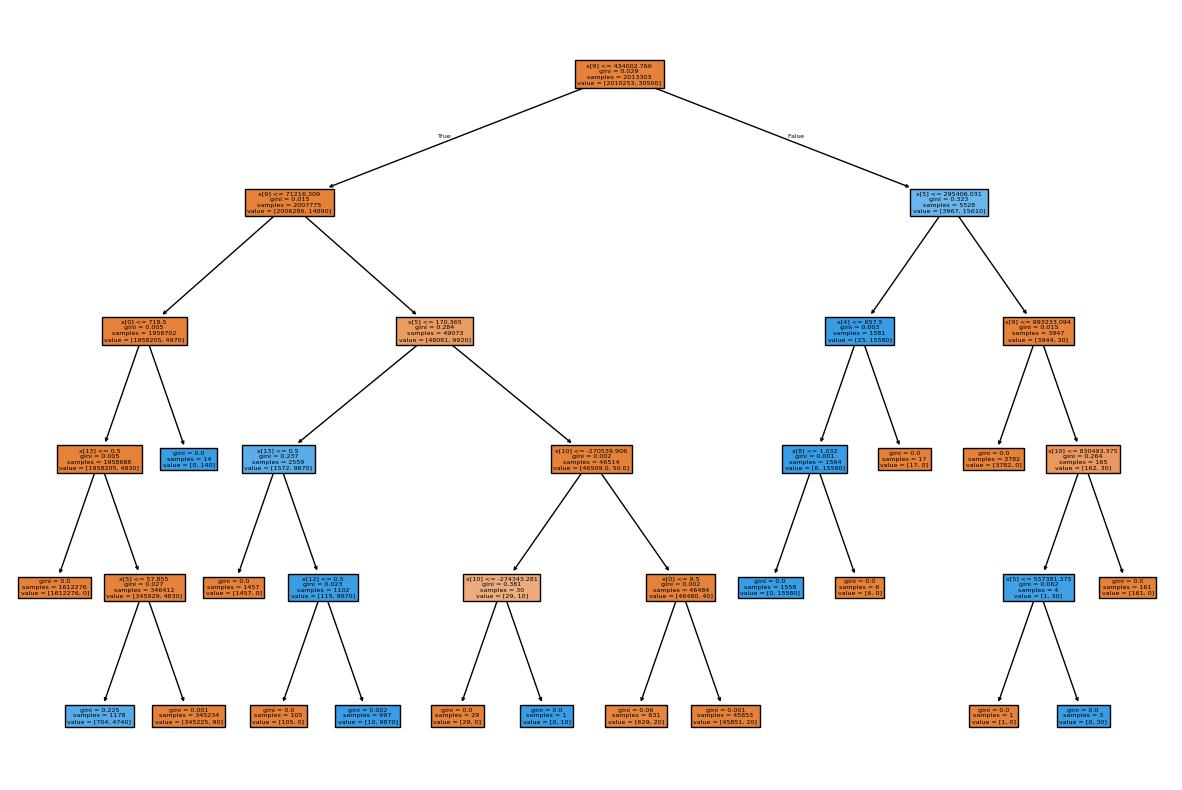

In [57]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt,filled=True)

In [58]:
dt.get_depth()

5

In [59]:
y_pred=dt.predict(X_test)

In [60]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Check the accuracy of the model :

In [61]:
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report

In [62]:
acc_score=accuracy_score(y_test,y_pred)
print(f"accuracy score :{acc_score} ")
print()
print("Confusion matrix :")
print(confusion_matrix(y_test,y_pred))
print()
print("Classification Report :")
print(classification_report(y_test,y_pred))

accuracy score :0.9996334381859064 

Confusion matrix :
[[669812    242]
 [     4   1043]]

Classification Report :
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    670054
           1       0.81      1.00      0.89      1047

    accuracy                           1.00    671101
   macro avg       0.91      1.00      0.95    671101
weighted avg       1.00      1.00      1.00    671101

